<a href="https://colab.research.google.com/github/srilakshmipanda/GDSC-Link/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report
from PIL import Image


In [ ]:
metadata = pd.read_csv('/content/drive/Shareddrives/GDSC Link/Data/metadata.csv')

In [ ]:
metadata.head()

,Unnamed: 0.1,Unnamed: 0,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,filepath
0,0,0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,...,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False,/content/drive/Shareddrives/GDSC Link/Data/img...
1,1,1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,...,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True,/content/drive/Shareddrives/GDSC Link/Data/img...
2,2,2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,...,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False,/content/drive/Shareddrives/GDSC Link/Data/img...
3,3,3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,...,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False,/content/drive/Shareddrives/GDSC Link/Data/img...
4,4,4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,...,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True,/content/drive/Shareddrives/GDSC Link/Data/img...


[link text](https://)Function to check if a file is corrupt given its path

In [ ]:
from re import T
def is_corrupt(file_path):
    try:
        with open(file_path, 'rb') as file:
            # You can add more checks for the file's integrity here
            # For example, you might want to check if it's a valid image, etc.
            file_content = file.read()
            # print('Success')
        return False
    except Exception as e:
        print(f"Corrupt file: {file_path}, Error: {e}")
        return True

def remove_corrupt_files(file_path):
    if os.path.isfile(file_path) and is_corrupt(file_path):
        os.remove(file_path)
        print(f"Removed corrupt file: {file_path}")
        return True
    return False


Functions for checking blank images

In [ ]:
# Function created, threshold represents cutoff point for white-scale (200 brightness recommended)
# Purpose: determine if image is blank based on pixel values
def is_blank(image_path, threshold=200):

  #Apply "try" to apply image operations and avoid invalid format or corrupted images
  #Use "except" in case there are errors in the image process
    try:

        # Opens the image specified by image_path using the Image.open method from PIL
        img = Image.open(image_path)

        # Convert the image to grayscale (brightness of pixels) from RGB. Single channel from 0-255. L represents luminance values
        img_gray = img.convert('L')

        # Taking pixel values from grayscale image and converting into list
        pixel_values = list(img_gray.getdata())

      # Finds average of the pixels from grayscale image and checks to see if it's higher than 200.
      # Higher than 200 means it's bright and therefore not considered blank, lower indicates dark/empty areas
        average_pixel_value = sum(pixel_values) / len(pixel_values)
        return average_pixel_value > threshold

    # In case of errors of image operation, Exception catches errors and prints message file DNE.
    except Exception as e: # assigning specific error to e
        print(f"Error processing file: {image_path}, Error: {e}")
        return False

# Purpose: uses information "is_blank" to determine whether remove blank image or print "It's not blank"
def remove_blank_images(file_path):
    if os.path.isfile(file_path): #Checks if the specified file exists
        if is_blank(file_path): #Calls is_blank function
            os.remove(file_path) #If it's blank then removes the file with print statement
            print(f"Removed blank image: {file_path}")
            return True
        else:
            print(f"Image is not blank: {file_path}") #If not blank, then different print statement
            return False
    else:
        print(f"File not found: {file_path}") #If file DNE exist, then prints that file isn't found
        return True


Traverses through all the imgIDs from metadata and removes any corrupt img files

In [ ]:
# metadata['filepath'] = metadata['img_id']
# count = 0
for index, row in metadata.iterrows():
  imageID = row['img_id']
  startID = int(imageID.split('_')[1])
  if startID < 586:
    folder = 'imgs_part_1'
  elif startID < 1094:
    folder = 'imgs_part_2'
  else:
    folder = 'imgs_part_3'

  path = '/content/drive/Shareddrives/GDSC Link/Data/' + folder + '/' + imageID
  metadata.at[index, 'filepath'] = path

  # if remove_corrupt_files(path):
    # metadata = metadata.drop(index)
  # if remove_blank_images(path):
    # metadata = metadata.drop(index)
    # count = count + 1

In [ ]:
count

15

In [ ]:
metadata

,Unnamed: 0,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,filepath
0,0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,...,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False,/content/drive/Shareddrives/GDSC Link/Data/img...
1,1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,...,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True,/content/drive/Shareddrives/GDSC Link/Data/img...
2,2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,...,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False,/content/drive/Shareddrives/GDSC Link/Data/img...
3,3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,...,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False,/content/drive/Shareddrives/GDSC Link/Data/img...
4,4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,...,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True,/content/drive/Shareddrives/GDSC Link/Data/img...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,...,ACK,True,False,False,False,False,False,PAT_1708_3156_175.png,False,/content/drive/Shareddrives/GDSC Link/Data/img...
2279,2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,...,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True,/content/drive/Shareddrives/GDSC Link/Data/img...
2280,2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,...,SEK,False,False,False,False,False,False,PAT_1343_1217_404.png,False,/content/drive/Shareddrives/GDSC Link/Data/img...
2281,2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,...,BCC,True,False,False,False,False,True,PAT_326_690_823.png,True,/content/drive/Shareddrives/GDSC Link/Data/img...


In [ ]:
train, test = train_test_split(metadata, test_size = 0.20, random_state = 42) # double check data variable

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'BCC'),
  Text(1, 0, 'ACK'),
  Text(2, 0, 'NEV'),
  Text(3, 0, 'SEK'),
  Text(4, 0, 'SCC'),
  Text(5, 0, 'MEL')])

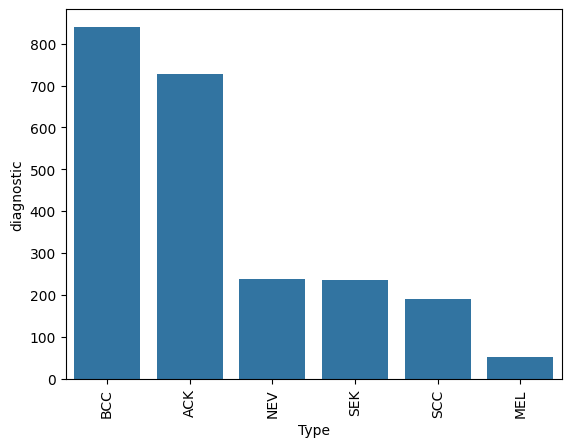

In [ ]:
counts = metadata.diagnostic.value_counts()
sns.barplot(x = counts.index, y = counts)
plt.xlabel('Type')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'BCC'),
  Text(1, 0, 'ACK'),
  Text(2, 0, 'SEK'),
  Text(3, 0, 'NEV'),
  Text(4, 0, 'SCC'),
  Text(5, 0, 'MEL')])

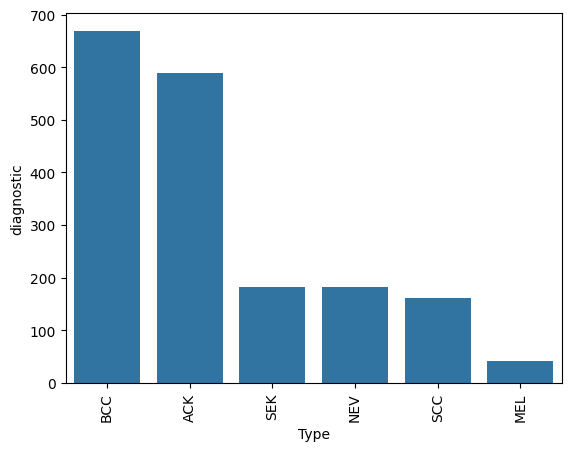

In [ ]:
counts = train.diagnostic.value_counts()
sns.barplot(x = counts.index, y = counts)
plt.xlabel('Type')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'BCC'),
  Text(1, 0, 'ACK'),
  Text(2, 0, 'NEV'),
  Text(3, 0, 'SEK'),
  Text(4, 0, 'SCC'),
  Text(5, 0, 'MEL')])

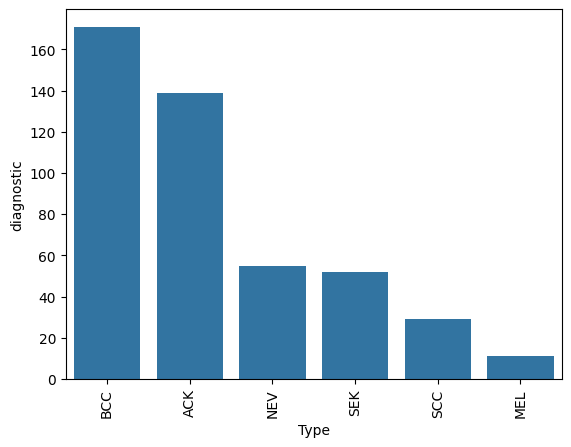

In [ ]:
counts = test.diagnostic.value_counts()
sns.barplot(x = counts.index, y = counts)
plt.xlabel('Type')
plt.xticks(rotation = 90)

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe = train,
    x_col='filepath',
    y_col='diagnostic',
    target_size=(100, 100),
    class_mode = 'categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

valid_gen = train_datagen.flow_from_dataframe(
    dataframe = test,
    x_col='filepath',
    y_col='diagnostic',
    target_size=(100, 100),
    class_mode = 'categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

test_gen = train_datagen.flow_from_dataframe(
    dataframe = test,
    x_col='filepath',
    y_col='diagnostic',
    target_size=(100, 100),
    class_mode = 'categorical',
    batch_size=32,
    shuffle=False
)

Found 1826 validated image filenames belonging to 6 classes.
Found 457 validated image filenames belonging to 6 classes.
Found 457 validated image filenames belonging to 6 classes.


In [ ]:
metadata.to_csv('/content/drive/Shareddrives/GDSC Link/Data/metadata.csv')